<a href="https://colab.research.google.com/github/Lavan1999/MLdataset-12-Country-clusters/blob/main/Country_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/content/Country clusters.csv")
df.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


# **Machine Learning**

In [3]:
df["Language"] = df["Language"].replace({'English':1, "French":2, "German":3 })
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,1
1,Canada,62.40,-96.80,1
2,France,46.75,2.40,2
3,UK,54.01,-2.53,1
4,Germany,51.15,10.40,3
5,Australia,-25.45,133.11,1


In [12]:
df1=df.iloc[:,1:]

In [13]:
model = KMeans(2)
result = model.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [14]:
identify_cluster = model.fit_predict(df1)
identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 0], dtype=int32)

In [15]:
df['cluster'] = identify_cluster
df

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,1,1
1,Canada,62.40,-96.80,1,1
2,France,46.75,2.40,2,1
3,UK,54.01,-2.53,1,1
4,Germany,51.15,10.40,3,1
5,Australia,-25.45,133.11,1,0


In [17]:
model.inertia_

13208.958119999996

In [24]:
all_wcss = []         # wcss = Within Cluster Sum of Squares
for i in range(1,7):
  model = KMeans(i)
  result = model.fit(df1)
  all_wcss.append(model.inertia_)
print(all_wcss)

[42605.41356666667, 13208.958119999996, 290.10523333333333, 113.91233333333332, 39.00624999999998, 0.0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

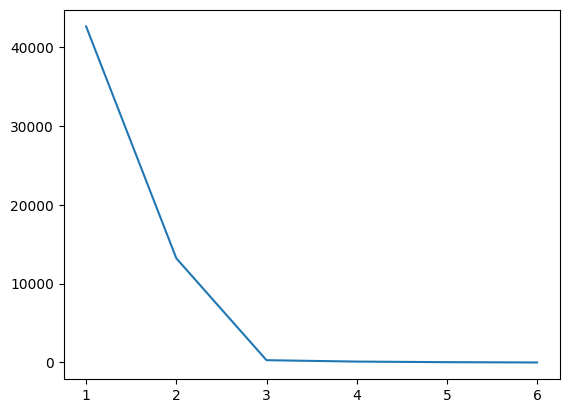

In [25]:
plt.plot(range(1,7), all_wcss)
plt.show()

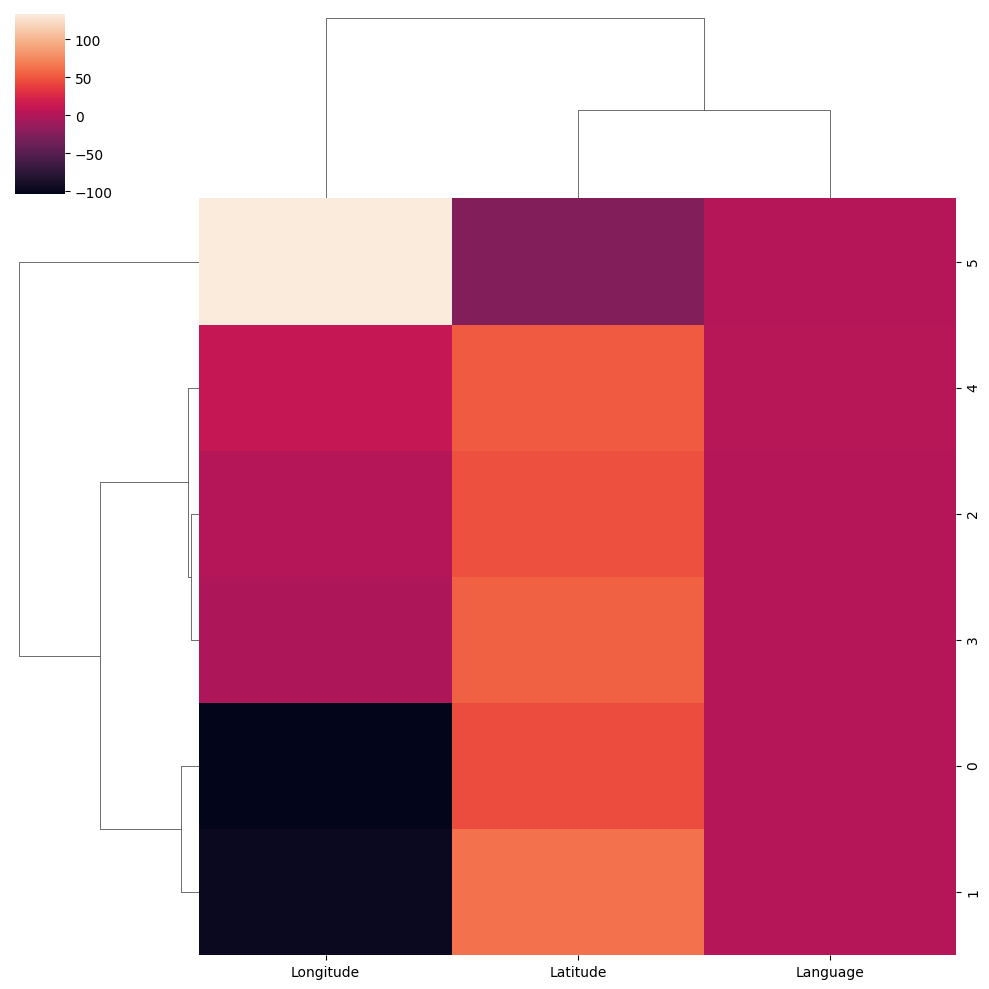

In [26]:
sns.clustermap(df1)
plt.savefig("MT15.jpg")

# **With all possible columns**

In [27]:
df = pd.read_csv("/content/Country clusters.csv")
df.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [29]:
df["Language"] = df["Language"].replace({'English':1, "French":2, "German":3 })
df.set_index('Country', inplace=True)
df

,Latitude,Longitude,Language
Country,,,
USA,44.97,-103.77,1
Canada,62.40,-96.80,1
France,46.75,2.40,2
UK,54.01,-2.53,1
Germany,51.15,10.40,3
Australia,-25.45,133.11,1


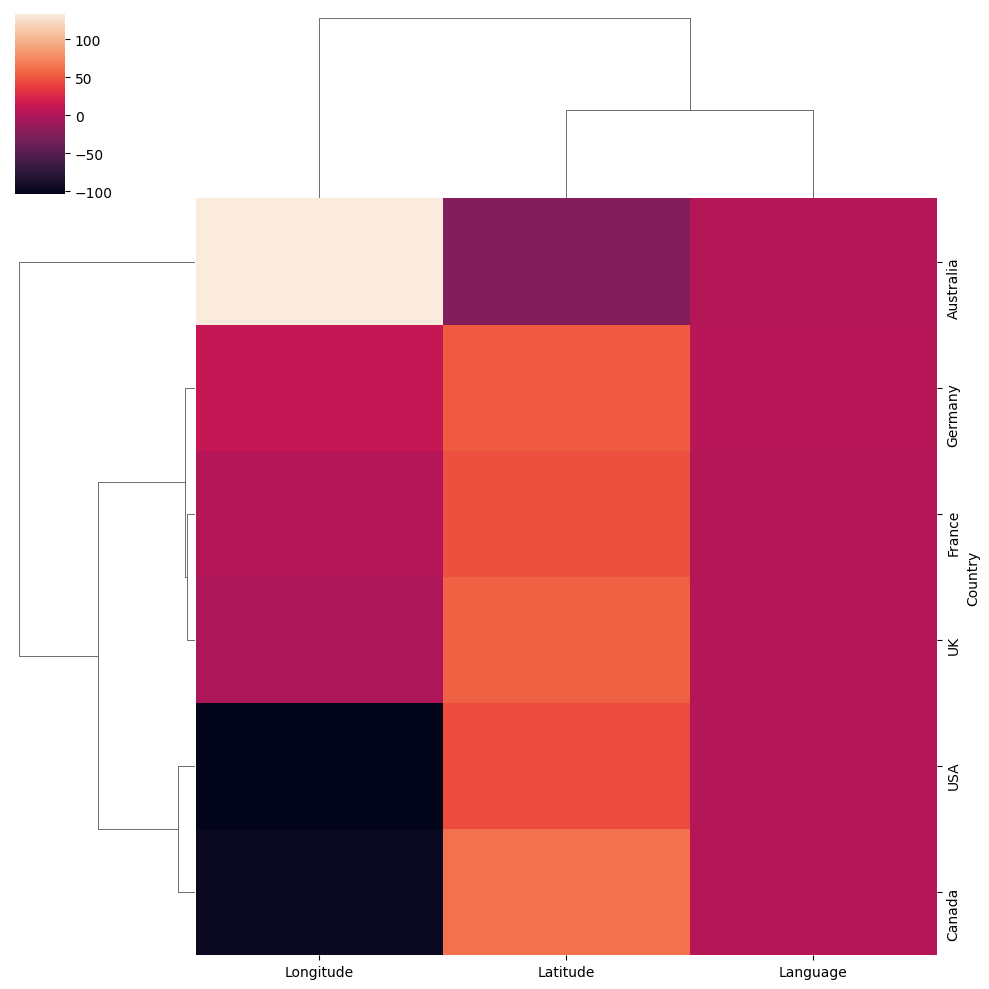

In [30]:
sns.clustermap(df)